In [ ]:
#Doing this because, sometimes we get an error 'module 'PIL.Image' has no attribute 'register_extensions' in Google Colab
#uninstall the old one
!pip uninstall -y Pillow
# install the new one
!pip install Pillow==4.1.1

Uninstalling Pillow-7.0.0:
  Successfully uninstalled Pillow-7.0.0
     |████████████████████████████████| 5.7MB 4.1MB/s 
     |████████████████████████████████| 112kB 55.5MB/s 
  Created wheel for olefile: filename=olefile-0.46-py2.py3-none-any.whl size=35417 sha256=21c1aab8bc9b7ff3fab4302eaf3b3a7bc534e214f76b9ec2048a40237303eab7
  Stored in directory: /root/.cache/pip/wheels/4b/f4/11/bc4166107c27f07fd7bba707ffcb439619197638a1ac986df3
Successfully built olefile
ERROR: scikit-image 0.16.2 has requirement pillow>=4.3.0, but you'll have pillow 4.1.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
## Restart the runtime ##

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import skimage
import torchvision
from skimage import io
import os
from PIL import Image
from skimage import transform
import torch
from matplotlib import cm
import scipy
from skimage.feature import hog

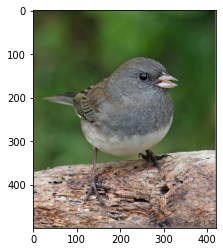

In [ ]:
fname = '/content/bird.jpg'
im = io.imread(fname)
im_pil = Image.fromarray(im)
plt.imshow(im)

In [ ]:
from get_models import get_default_model, cascade_randomization, independent_randomization
from prepare_model import prepare_model_for_gradcam
from updated_utils import get_saliency, batch_overlay

In [ ]:
modelname = 'vgg19'

In [ ]:
# for egyptian cat class_of_interest = 285

# for junco bird
class_of_interest = 13


##For Default Model (VGG19)##

L_c_np max : 162.86155700683594


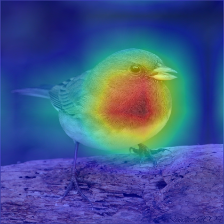

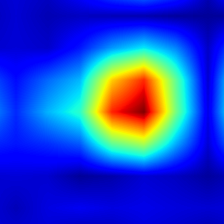

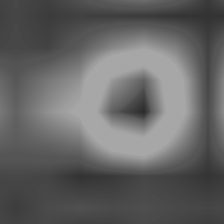

In [ ]:
model,model_imsize,preprocess = get_default_model(modelname)
last_spatial_layer,hooked_last_spatial,bwdhooked_last_spatial = prepare_model_for_gradcam(modelname,model)

ref = preprocess(im_pil).unsqueeze(0)
#print(ref.shape)
ref = ref.cuda()

L_c_np,heat_map,ref_scores= get_saliency(model, ref , class_of_interest, model_imsize, last_spatial_layer)
#print(L_c_np.shape,np.array(heat_map).shape)

saliency_overlayed,pil_heat_map_jet = batch_overlay(heat_map,[im], model_imsize)
display(saliency_overlayed[0])
#plt.figure()
display(pil_heat_map_jet[0])

original_output_binary = np.mean(np.asarray(pil_heat_map_jet[0]), axis=2).astype('uint8')
display(Image.fromarray(original_output_binary))

##Cascade Randomized Model##

L_c_np max : 0.11128222942352295
For last 1 layers


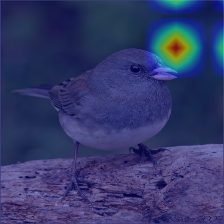

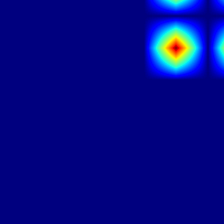

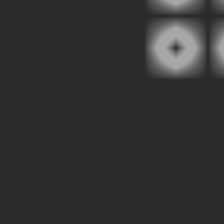

correlation -----> 0.00013658909153390036
L_c_np max : 0.4639561176300049
For last 2 layers


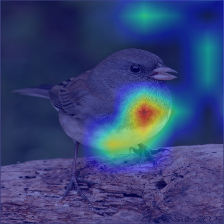

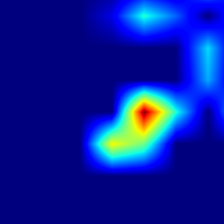

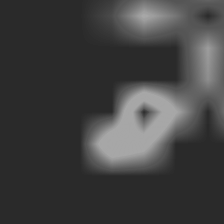

correlation -----> 0.28617830347224815
L_c_np max : 0.2181682586669922
For last 3 layers


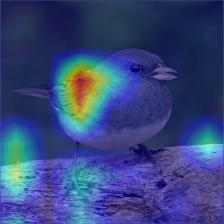

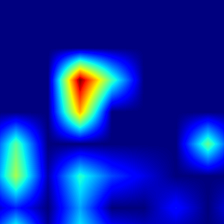

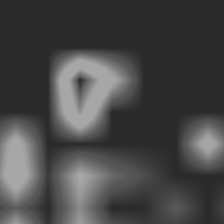

correlation -----> 0.02941426062648723
L_c_np max : 0.34377920627593994
For last 4 layers


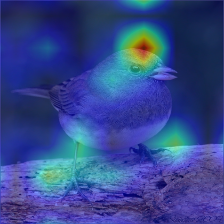

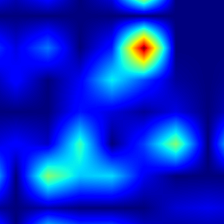

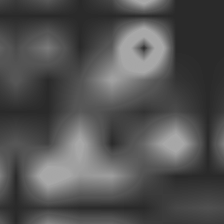

correlation -----> 0.334481337566701
L_c_np max : 0.08685064315795898
For last 5 layers


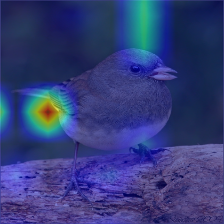

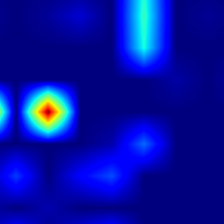

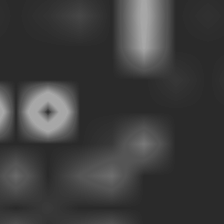

correlation -----> 0.14209551195059733
L_c_np max : 0.07734557241201401
For last 6 layers


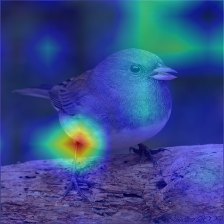

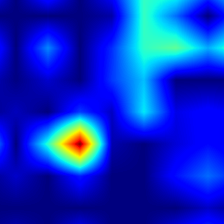

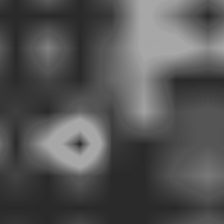

correlation -----> 0.2632658766191538
L_c_np max : 0.031417541205883026
For last 7 layers


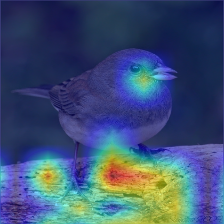

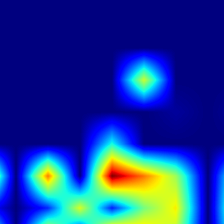

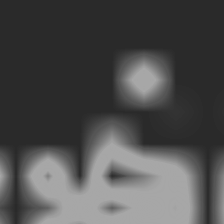

correlation -----> -0.15738579179670856
L_c_np max : 0.030614562332630157
For last 8 layers


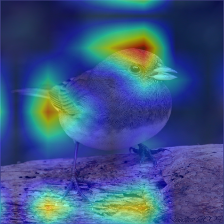

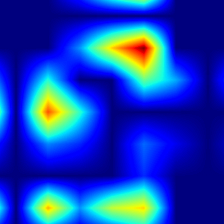

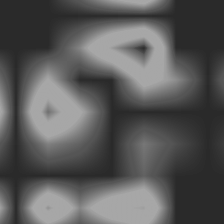

correlation -----> 0.42622690043256123
L_c_np max : 0.022885069251060486
For last 9 layers


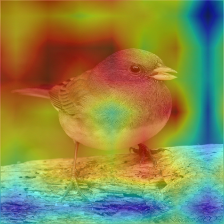

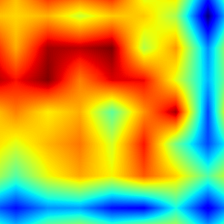

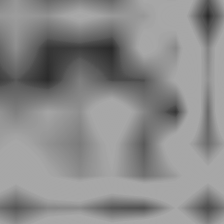

correlation -----> -0.162417564389531
L_c_np max : 0.0
For last 10 layers


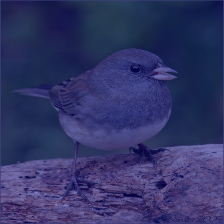

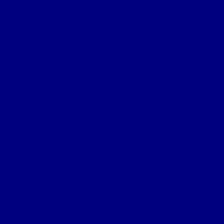

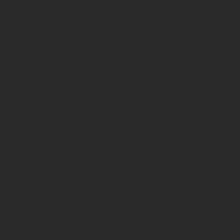

correlation -----> nan


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


L_c_np max : 0.008489741943776608
For last 11 layers


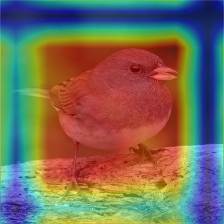

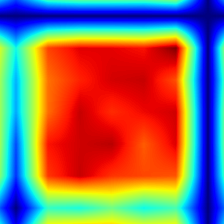

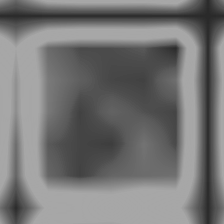

correlation -----> -0.13028545067740777
L_c_np max : 0.018935982137918472
For last 12 layers


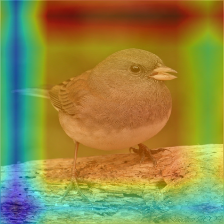

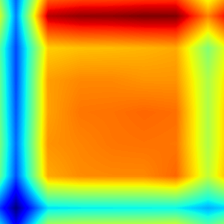

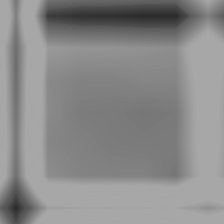

correlation -----> -0.19306645017834909
L_c_np max : 0.034290336072444916
For last 13 layers


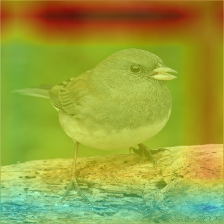

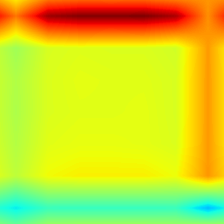

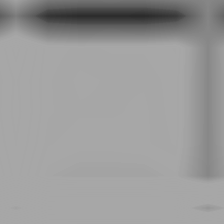

correlation -----> 0.21369926753738172
L_c_np max : 0.011611919850111008
For last 14 layers


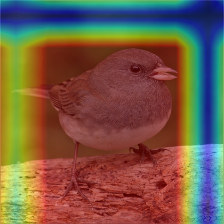

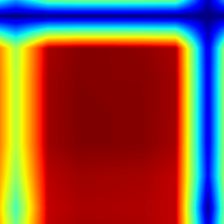

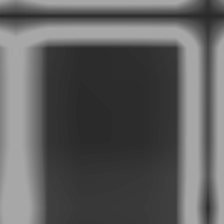

correlation -----> -0.38379841038055656
L_c_np max : 0.05072950944304466
For last 15 layers


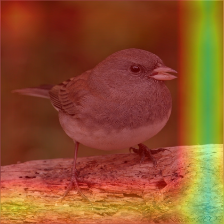

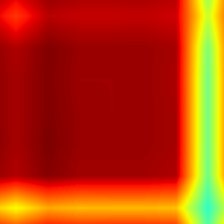

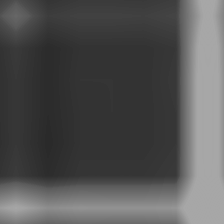

correlation -----> -0.5472402643148999
L_c_np max : 0.03224004805088043
For last 16 layers


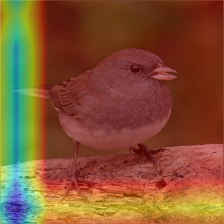

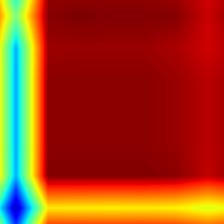

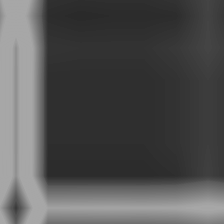

correlation -----> -0.3682821142096639


In [ ]:
a = original_output_binary.flatten()

correlation_cascade_random_list = [scipy.stats.spearmanr(a, a)[0]]

for i in range(1, 17):
  model, model_imsize, preprocess = cascade_randomization(modelname = modelname, num_layers_from_last = i)
  last_spatial_layer,hooked_last_spatial,bwdhooked_last_spatial = prepare_model_for_gradcam(modelname,model)

  ref = preprocess(im_pil).unsqueeze(0)
  #print(ref.shape)
  ref = ref.cuda()

  L_c_np,heat_map,ref_scores= get_saliency(model, ref, class_of_interest, model_imsize, last_spatial_layer)
  #print(L_c_np.shape,np.array(heat_map).shape)

  saliency_overlayed,pil_heat_map_jet = batch_overlay(heat_map,[im], model_imsize)

  print(f'For last {i} layers')
  display(saliency_overlayed[0])
  #plt.figure()
  display(pil_heat_map_jet[0])
  another_output_binary = np.mean(np.asarray(pil_heat_map_jet[0]), axis=2).astype('uint8')
  display(Image.fromarray(another_output_binary))

  b = another_output_binary.flatten()

  corr, p = scipy.stats.spearmanr(a, b)
  print(f'correlation -----> {corr}')

  correlation_cascade_random_list.append(corr)



##Independent Randomization Model##

L_c_np max : 0.28420111536979675
For layer 1 from last


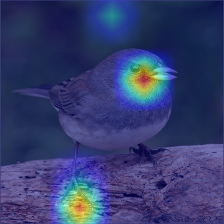

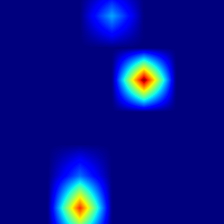

correlation -----> -0.3682821142096639
L_c_np max : 0.8225496411323547
For layer 2 from last


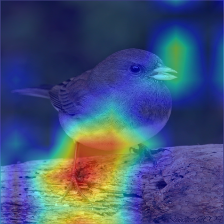

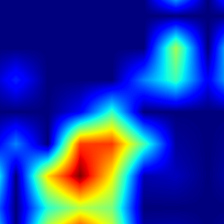

correlation -----> -0.3682821142096639
L_c_np max : 1.5781304836273193
For layer 3 from last


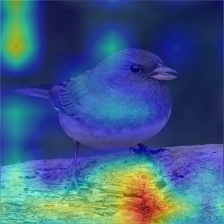

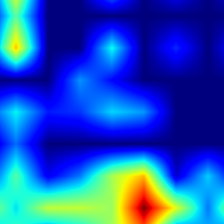

correlation -----> -0.3682821142096639
L_c_np max : 2.201645851135254
For layer 4 from last


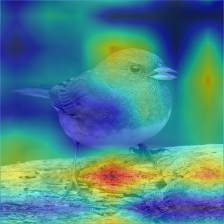

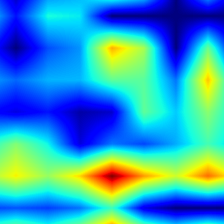

correlation -----> -0.3682821142096639
L_c_np max : 2.248757839202881
For layer 5 from last


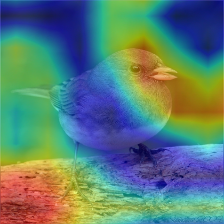

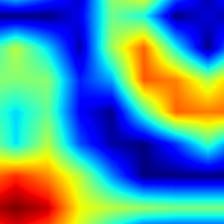

correlation -----> -0.3682821142096639
L_c_np max : 0.13826218247413635
For layer 6 from last


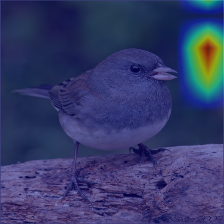

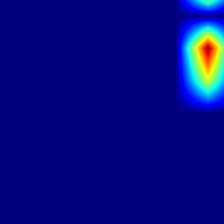

correlation -----> -0.3682821142096639
L_c_np max : 1.2608126401901245
For layer 7 from last


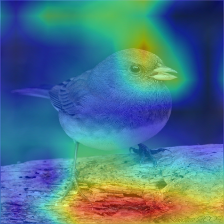

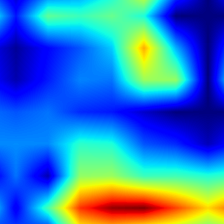

correlation -----> -0.3682821142096639
L_c_np max : 1.1620389223098755
For layer 8 from last


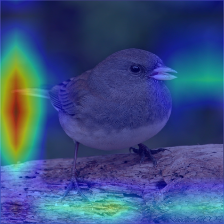

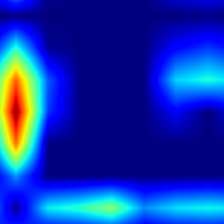

correlation -----> -0.3682821142096639
L_c_np max : 2.590141773223877
For layer 9 from last


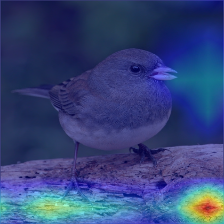

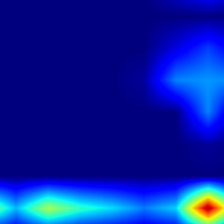

correlation -----> -0.3682821142096639
L_c_np max : 0.7161019444465637
For layer 10 from last


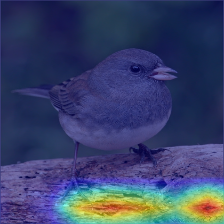

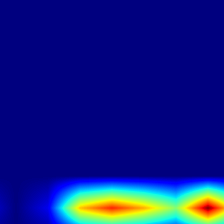

correlation -----> -0.3682821142096639
L_c_np max : 0.5019292831420898
For layer 11 from last


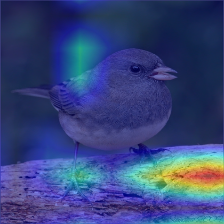

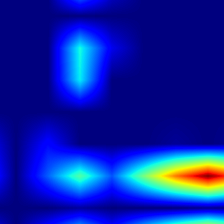

correlation -----> -0.3682821142096639
L_c_np max : 0.5628527998924255
For layer 12 from last


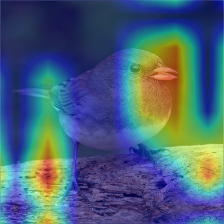

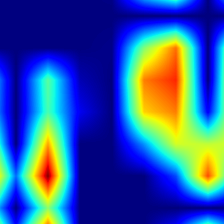

correlation -----> -0.3682821142096639
L_c_np max : 1.3761801719665527
For layer 13 from last


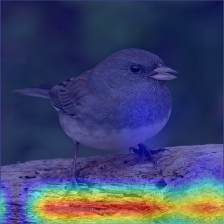

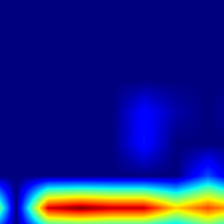

correlation -----> -0.3682821142096639
L_c_np max : 0.5351221561431885
For layer 14 from last


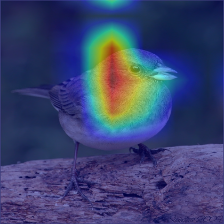

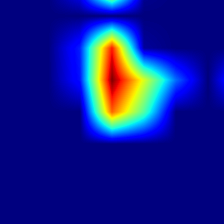

correlation -----> -0.3682821142096639
L_c_np max : 2.32106351852417
For layer 15 from last


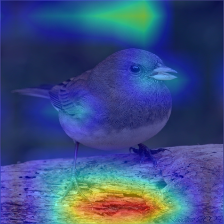

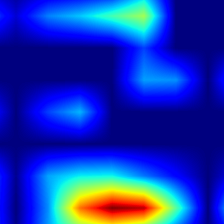

correlation -----> -0.3682821142096639
L_c_np max : 6.319084644317627
For layer 16 from last


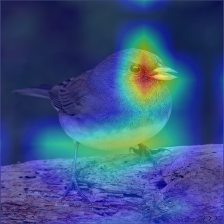

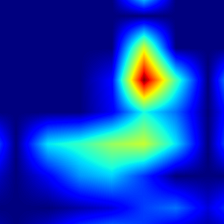

correlation -----> -0.3682821142096639


In [ ]:
a = original_output_binary.flatten()

correlation_independent_random_list = [scipy.stats.spearmanr(a, a)[0]]

for i in range(1, 17):
  model, model_imsize, preprocess = independent_randomization(modelname = modelname, layer = i)
  last_spatial_layer,hooked_last_spatial,bwdhooked_last_spatial = prepare_model_for_gradcam(modelname,model)

  ref = preprocess(im_pil).unsqueeze(0)
  #print(ref.shape)
  ref = ref.cuda()

  L_c_np,heat_map,ref_scores= get_saliency(model,ref,class_of_interest,model_imsize, last_spatial_layer)
  #print(L_c_np.shape,np.array(heat_map).shape)

  saliency_overlayed,pil_heat_map_jet = batch_overlay(heat_map,[im], model_imsize)

  print(f'For layer {i} from last')
  display(saliency_overlayed[0])
  #plt.figure()
  display(pil_heat_map_jet[0])

  b = another_output_binary.flatten()

  corr, p = scipy.stats.spearmanr(a, b)
  print(f'correlation -----> {corr}')

  correlation_independent_random_list.append(corr)


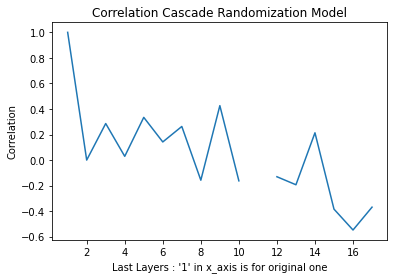

In [ ]:
x_axis = [i for i in range(1, 18)]
y_axis = correlation_cascade_random_list

plt.figure()
plt.title('Correlation Cascade Randomization Model')
plt.xlabel('''Last Layers : '1' in x_axis is for original one''')
plt.ylabel('Correlation')
plt.plot(x_axis, y_axis)

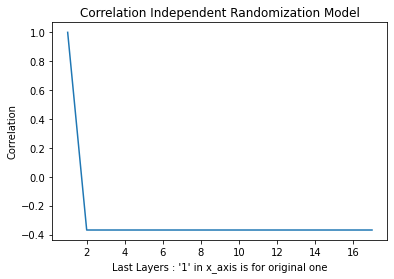

In [ ]:
x_axis = [i for i in range(1, 18)]
y_axis = correlation_independent_random_list

plt.figure()
plt.title('Correlation Independent Randomization Model')
plt.xlabel('''Last Layers : '1' in x_axis is for original one''')
plt.ylabel('Correlation')
plt.plot(x_axis, y_axis)